In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def mse(y, y_hat):
    return np.sum((y - y_hat)**2) / (2 * len(y_hat))
    
def mae(y, y_hat):
    return np.sum(np.abs(y - y_hat)) / len(y_hat)

def rmse(y, y_hat):
    return np.sqrt(2*np.sum((y - y_hat)**2) / (2 * len(y_hat)))

In [3]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    y_hat = np.sum(tx * w,axis=1)
    return mse(y, y_hat)

In [4]:
def compute_rmse(y, tx, w):
    y_hat = np.sum(tx * w,axis=1)
    return rmse(y, y_hat)

In [5]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.solve(tx.T.dot(tx),tx.T.dot(y))
    e = compute_rmse(y, tx, w)
    return w, e

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([w0[i],w1[j]])
            losses[i][j] = compute_rmse(y, tx, w)
    return losses

In [7]:
def generate_w(num_intervals):
    w0 = np.linspace(-100,200, num_intervals)
    w1 = np.linspace(-150,150, num_intervals)
    return w0, w1

In [8]:
def get_best_parameters(w0, w1, losses):
    min_row, min_col = np.unravel_index(np.argmin(losses), losses.shape)
    return losses[min_row, min_col], w0[min_row], w1[min_col]


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [43]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1 ,grid_losses)
    
    weights, mse = least_squares(y, tx)
    
    print('Grid Search: w0: {:.3f} w1: {:.3f} MSE: {:.3f} \n Least Squares: w0: {:.3f} w1: {:.3f} MSE: {:.3f}'.format(w0_star, w1_star,loss_star,weights[0],weights[1],mse))
    
    return [loss_star,mse]

Test it here

In [42]:
test_your_least_squares()

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]
Grid Search: w0: 72.727 w1: 13.636 MSE: 5.578 
 Least Squares: w0: 73.294 w1: 13.480 MSE: 5.547


[5.578297835112344, 5.547231357863019]

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [11]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [12]:
# def build_poly(x, degree):
#     """polynomial basis functions for input data x, for j=0 up to j=degree."""
#     # ***************************************************
#     # INSERT YOUR CODE HERE
#     # polynomial basis function: TODO
#     # this function should return the matrix formed
#     # by applying the polynomial basis to the input data
#     # ***************************************************
#     basis = np.power(x,0).reshape(x.shape[0],1)
#     for i in range(1,degree+1):
#         print(i)
#         basis = np.insert(basis, 1, np.power(x,i), axis = 1)
#     return basis

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [13]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        basis_x = build_poly(x, degree)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        
        weights, rmse = least_squares(y, basis_x)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.24965870360907377
Processing 4th experiment, degree=12, rmse=0.24411648787382031


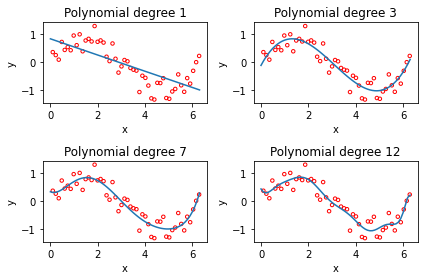

In [14]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [23]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    rand_x = np.random.permutation(x)
    np.random.seed(seed)
    rand_y = np.random.permutation(y)
    
    t = int(ratio*len(x))
    
    train_x = rand_x[:t]
    test_x = rand_x[t:]
    train_y = rand_y[:t]
    test_y = rand_y[t:]
    
    return train_x, train_y, test_x, test_y

Then, test your `split_data` function below.

In [34]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    # calculate weight through least square: TODO
    # ***************************************************
    weights, rmse_tr = least_squares(y_train, x_train)
    # ***************************************************
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_te = compute_rmse(y_test, x_test, weights)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [35]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.259
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.857
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.133
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=5.171


**Look at the training and test RMSE for degree 3. Does this make sense? Why? Discuss with other if you are unclear.** <br>
Training RMSE is worse than test RMSE<br>
Test sample is very small at 10% and therefore by chance we are getting points that gives us a lower RMSE than the data that we have fit too.

# 3 Ridge Regression
Please fill in the function below.

In [71]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(tx)
    D = tx.shape[1]
    
    w = np.linalg.solve(tx.T.dot(tx)+2*N*lambda_*np.identity(D),tx.T.dot(y))
    e = compute_rmse(y, tx, w)
    
    return w, e
    

In [72]:
ridge_regression(y, x.reshape(50,1), 1)

(array([-0.080614]), 0.6289229080801004)

In [73]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    xp_train = build_poly(x_train, degree)
    xp_test = build_poly(x_test, degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights, rmse_tr_ = ridge_regression(y_train, xp_train, lambda_)
        rmse_te_ = compute_rmse(y_test, xp_test, weights)
        
        rmse_tr.append(rmse_tr_)
        rmse_te.append(rmse_te_)
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.2, degree=10, lambda=0.000, Training RMSE=0.170, Testing RMSE=1.691
proportion=0.2, degree=10, lambda=0.000, Training RMSE=0.170, Testing RMSE=1.433
proportion=0.2, degree=10, lambda=0.000, Training RMSE=0.170, Testing RMSE=1.273
proportion=0.2, degree=10, lambda=0.000, Training RMSE=0.171, Testing RMSE=1.116
proportion=0.2, degree=10, lambda=0.000, Training RMSE=0.172, Testing RMSE=0.919
proportion=0.2, degree=10, lambda=0.001, Training RMSE=0.174, Testing RMSE=0.700
proportion=0.2, degree=10, lambda=0.001, Training RMSE=0.177, Testing RMSE=0.529
proportion=0.2, degree=10, lambda=0.003, Training RMSE=0.180, Testing RMSE=0.438
proportion=0.2, degree=10, lambda=0.007, Training RMSE=0.181, Testing RMSE=0.404
proportion=0.2, degree=10, lambda=0.016, Training RMSE=0.182, Testing RMSE=0.396
proportion=0.2, degree=10, lambda=0.037, Training RMSE=0.184, Testing RMSE=0.406
proportion=0.2, degree=10, lambda=0.085, Training RMSE=0.188, Testing RMSE=0.442
proportion=0.2, degree=10, l

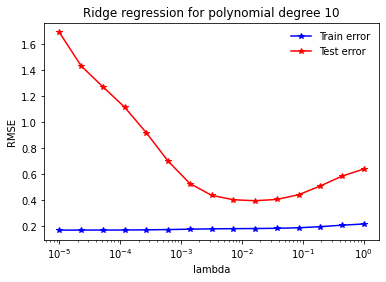

In [79]:
seed = 56
degree = 10
split_ratio = 0.2
ridge_regression_demo(x, y, degree, split_ratio, seed)